In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
from pocketml.clustering.kmeans import KMeans

# load mall_customers.csv
df = pd.read_csv("datasets/mall_customers.csv")
df.dropna(inplace=True)
df["Gender"] = (df["Gender"] == "Male").astype(int)
X = df[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]].values

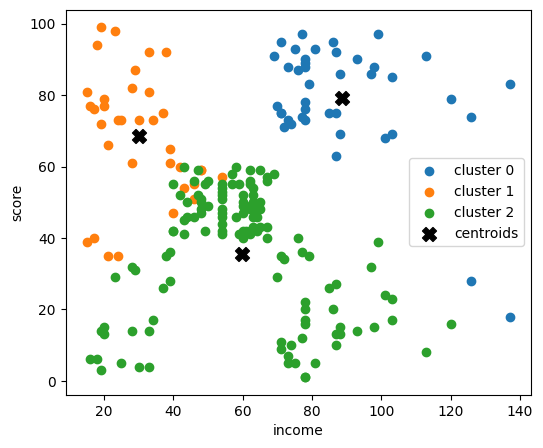

In [2]:
# fit kmeans
model = KMeans(k=3, max_iters=100)
model.fit(X)

# plot 2d slice: income vs spending
labels = model.labels_
centroids = model.centroids

plt.figure(figsize=(6,5))
for j in range(3):
    pts = X[labels == j]
    plt.scatter(pts[:,2], pts[:,3], label=f"cluster {j}")
plt.scatter(centroids[:,2], centroids[:,3],
            c="k", marker="X", s=100, label="centroids")
plt.xlabel("income"), plt.ylabel("score")
plt.legend()
plt.show()